In [1]:
import os
import random

from math import sqrt

<br>
<br>

# 데이터 로드

In [2]:
# 블로그 BoW 데이터 로드
f = open("./blogdata.txt")
lines = [line for line in f]

# 블로그 이름
rownames = []

# 단어 이름
# 행 제목인 첫 번째 단어는 제외하고 추출
colnames = lines[0].strip().split('\t')[1:]

# BoW 데이터
data = []

# 실제 데이터인 두 번째 행부터 반복
for line in lines[1:]:
    # Tab으로 구분하여 토큰 추출
    # strip() : 양쪽 끝의 공백 삭제
    tokens = line.strip().split('\t')
    
    # 블로그 이름 추가
    rownames.append(tokens[0])
    
    # 단어의 개수인 BoW 추가
    data.append([float(x) for x in tokens[1:]])

In [3]:
len(rownames)


99

In [4]:
rownames


["The Superficial - Because You're Ugly",
 'Wonkette',
 'Publishing 2.0',
 'Eschaton',
 'Blog Maverick',
 'Mashable!',
 'we make money not art',
 'GigaOM',
 'Joho the Blog',
 "Neil Gaiman's Journal",
 'Signal vs. Noise',
 'lifehack.org',
 'Hot Air',
 'Online Marketing Report',
 'Kotaku',
 'Talking Points Memo: by Joshua Micah Marshall',
 "John Battelle's Searchblog",
 '43 Folders',
 'Daily Kos',
 'Deadspin',
 'Go Fug Yourself',
 "O'Reilly Radar",
 'Andrew Sullivan | The Daily Dish',
 'Lifehacker',
 'Google Operating System',
 'Valleywag',
 'Gizmodo',
 'ScienceBlogs : Combined Feed',
 'Michelle Malkin',
 'SimpleBits',
 'Slashdot',
 'Gothamist',
 'BuzzMachine',
 "Sifry's Alerts",
 'Topix.net Weblog',
 'The Viral Garden',
 'Micro Persuasion',
 'Cool Hunting',
 'SpikedHumor',
 'flagrantdisregard',
 'Search Engine Watch Blog',
 'Joystiq',
 'Download Squad',
 "Captain's Quarters",
 'MAKE Magazine',
 'Engadget',
 'CoolerHeads Prevail',
 'Power Line',
 'Techdirt',
 'Official Google Blog',
 'Th

In [5]:
len(colnames)


706

In [6]:
colnames


['china',
 'kids',
 'music',
 'yahoo',
 'want',
 'wrong',
 'service',
 'tech',
 'saying',
 'lots',
 'had',
 'address',
 'working',
 'following',
 'years',
 'didn',
 'internet',
 'wants',
 'photos',
 'former',
 'technology',
 'being',
 'traffic',
 'small',
 'past',
 'full',
 'november',
 'experience',
 'door',
 'company',
 'learn',
 'paper',
 'research',
 'sell',
 'self',
 'sometimes',
 'couple',
 'video',
 'makes',
 'next',
 'process',
 'books',
 'could',
 'stuff',
 'audio',
 'web',
 'become',
 'problem',
 'details',
 'worth',
 'provide',
 'feeds',
 'another',
 'john',
 'away',
 'hand',
 'thanks',
 'night',
 'test',
 'update',
 'guy',
 'cost',
 'product',
 'still',
 'non',
 'drop',
 'year',
 'tried',
 'america',
 'amp',
 'start',
 'podcast',
 'month',
 'advertising',
 'ask',
 'almost',
 'systems',
 'american',
 'culture',
 'close',
 'pictures',
 'smart',
 'showing',
 'popular',
 'application',
 'e',
 'dvd',
 'camera',
 'links',
 'including',
 'during',
 'university',
 'special',
 'time

In [7]:
len(data)


99

In [8]:
len(data[0])


706

In [9]:
print(data[0])


[0.0, 1.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 6.0, 0.0, 1.0, 0.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 5.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 3.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 4.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 1.0,

<br>
<br>

# K-Means 군집화

In [10]:
# 피어슨 유사도
# -1 ~ 1 사이의 값(-1 : 정반대, 0 : 불일치, 1 : 동일)
def pearson(v1, v2):
    
    sum1 = sum(v1)
    sum2 = sum(v2)

    sum1Sq = sum([pow(v, 2) for v in v1])
    sum2Sq = sum([pow(v, 2) for v in v2])

    pSum = sum([v1[i] * v2[i] for i in range(len(v1))])

    num = pSum - sum1 * sum2 / len(v1)
    den = sqrt((sum1Sq - pow(sum1, 2) / len(v1)) * (sum2Sq - pow(sum2, 2) / len(v1)))

    if den == 0:
        return 0

    # 유사도를 거리값으로 변환
    return 1.0 - num / den

In [11]:
# 0에 가까울수록 두 항목의 거리가 짧음
print(pearson(data[0], data[1]))
print(pearson(data[0], data[2]))
print(pearson(data[0], data[3]))


0.550464834109853
1.039443467887571
0.8998592309922013


In [12]:
# K-Means 군집화
def k_means(rows, k=3):
    
    # 각 점의 최대값과 최소값을 구함
    ranges = [(min([row[i] for row in rows]), max([row[i] for row in rows]))
                for i in range(len(rows[0]))]

    # 최대값과 최소값에 따라 k개의 중심점을 랜덤하게 설정
    clusters = [[random.random() * (ranges[i][1] - ranges[i][0]) + ranges[i][0]
                    for i in range(len(rows[0]))] for j in range(k)]

    # 첫 번째 군집 출력
    print(clusters[0])
    print()
    
    # 이전 결과 초기화
    lastmatches = None
    
    # 최대 반복 횟수
    max_iteration = 100
    
    # 군집을 반복해서 계산
    for t in range(max_iteration):
        print("Iteration %d" % t)
        bestmatches = [[] for i in range(k)]

        # 각 항목마다 가장 가까운 중심점을 찾음
        for j in range(len(rows)):
            row = rows[j]
            bestmatch = 0
            
            for i in range(k):
                d = pearson(clusters[i], row)
                
                # 가장 가까운 군집인 현재 k를 설정
                if d < pearson(clusters[bestmatch], row):
                    bestmatch = i
                    
            bestmatches[bestmatch].append(j)
            if t == 0: print(bestmatches)

        # 군집 결과가 이전과 변화가 없다면 중지
        if bestmatches == lastmatches:
            break

        # 새로운 군집 결과 저장
        lastmatches = bestmatches

        # 군집의 중심점을 다시 계산
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            
            if len(bestmatches[i]) > 0:
                # 군집에 속하는 모든 항목의 각 단어 개수를 모두 더함
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                        
                # 단어 개수의 총합을 군집의 항목 개수로 나누어 평균 계산
                for j in range(len(avgs)):
                    avgs[j] /= len(bestmatches[i])
                    
                # 군집 재설정
                clusters[i] = avgs
                
    return bestmatches

In [13]:
# K-Means 군집화 수행
clusters = k_means(data, 5)


[9.20842674694888, 0.9229012962599861, 6.9551781306950975, 7.151224370719341, 9.676930509071486, 1.7104965173205393, 5.330662613075225, 4.232117777976557, 5.04131791790991, 2.640412206968687, 5.364120161279168, 9.382488667240716, 3.615246138141779, 1.1071774651720863, 5.311861786964124, 5.792413329315719, 6.682145505194439, 4.020128977716539, 5.163479910234008, 2.3166622404439248, 9.964111249981977, 2.846439503980856, 3.6125938184609554, 7.568998714512931, 8.374277542446249, 21.925678448326305, 3.7428054891481874, 8.488724837373674, 8.830278916116427, 16.92835718020814, 8.995918768147838, 2.6366916215224245, 3.377352834378743, 1.8124256677497552, 3.953176312495765, 1.5208108442309225, 1.4708970741634482, 10.5067304249703, 3.8026203396678024, 10.83006173473025, 4.8502469308171134, 6.270674860412015, 0.33372851091370725, 0.7453833312243887, 2.7882554450462855, 10.187557387773728, 3.5855848400665282, 3.5504239271738096, 5.545213944218922, 3.0386336825217324, 3.3999032080302225, 10.0995279

[[], [], [], [], [0, 1]]
[[], [], [], [], [0, 1, 2]]
[[], [], [], [], [0, 1, 2, 3]]
[[], [4], [], [], [0, 1, 2, 3]]
[[], [4, 5], [], [], [0, 1, 2, 3]]
[[], [4, 5, 6], [], [], [0, 1, 2, 3]]
[[], [4, 5, 6, 7], [], [], [0, 1, 2, 3]]
[[], [4, 5, 6, 7], [], [], [0, 1, 2, 3, 8]]
[[], [4, 5, 6, 7], [], [], [0, 1, 2, 3, 8, 9]]
[[10], [4, 5, 6, 7], [], [], [0, 1, 2, 3, 8, 9]]
[[10, 11], [4, 5, 6, 7], [], [], [0, 1, 2, 3, 8, 9]]
[[10, 11], [4, 5, 6, 7], [], [12], [0, 1, 2, 3, 8, 9]]
[[10, 11], [4, 5, 6, 7], [], [12, 13], [0, 1, 2, 3, 8, 9]]
[[10, 11], [4, 5, 6, 7, 14], [], [12, 13], [0, 1, 2, 3, 8, 9]]
[[10, 11], [4, 5, 6, 7, 14], [15], [12, 13], [0, 1, 2, 3, 8, 9]]
[[10, 11, 16], [4, 5, 6, 7, 14], [15], [12, 13], [0, 1, 2, 3, 8, 9]]
[[10, 11, 16, 17], [4, 5, 6, 7, 14], [15], [12, 13], [0, 1, 2, 3, 8, 9]]
[[10, 11, 16, 17], [4, 5, 6, 7, 14], [15], [12, 13], [0, 1, 2, 3, 8, 9, 18]]
[[10, 11, 16, 17], [4, 5, 6, 7, 14], [15], [12, 13], [0, 1, 2, 3, 8, 9, 18, 19]]
[[10, 11, 16, 17], [4, 5, 6, 7, 14]

[[10, 11, 16, 17, 23, 24, 30, 36, 40, 48, 49, 55, 56, 59, 69, 70, 72, 73, 75, 79, 80], [4, 5, 6, 7, 14, 26, 31, 32, 33, 34, 35, 38, 39, 41, 42, 46, 57, 63, 67, 68, 74, 78, 81], [15, 22, 44, 50, 54, 60, 61, 65, 77, 82], [12, 13, 27, 28, 29, 37, 43, 47, 52, 58, 62, 64, 71], [0, 1, 2, 3, 8, 9, 18, 19, 20, 21, 25, 45, 51, 53, 66, 76, 83]]
[[10, 11, 16, 17, 23, 24, 30, 36, 40, 48, 49, 55, 56, 59, 69, 70, 72, 73, 75, 79, 80, 84], [4, 5, 6, 7, 14, 26, 31, 32, 33, 34, 35, 38, 39, 41, 42, 46, 57, 63, 67, 68, 74, 78, 81], [15, 22, 44, 50, 54, 60, 61, 65, 77, 82], [12, 13, 27, 28, 29, 37, 43, 47, 52, 58, 62, 64, 71], [0, 1, 2, 3, 8, 9, 18, 19, 20, 21, 25, 45, 51, 53, 66, 76, 83]]
[[10, 11, 16, 17, 23, 24, 30, 36, 40, 48, 49, 55, 56, 59, 69, 70, 72, 73, 75, 79, 80, 84, 85], [4, 5, 6, 7, 14, 26, 31, 32, 33, 34, 35, 38, 39, 41, 42, 46, 57, 63, 67, 68, 74, 78, 81], [15, 22, 44, 50, 54, 60, 61, 65, 77, 82], [12, 13, 27, 28, 29, 37, 43, 47, 52, 58, 62, 64, 71], [0, 1, 2, 3, 8, 9, 18, 19, 20, 21, 25, 45

In [14]:
# 군집 출력
for k in range(len(clusters)):
    print([rownames[row] for row in clusters[k]])
    print()
    

['Publishing 2.0', 'Mashable!', 'GigaOM', "John Battelle's Searchblog", "O'Reilly Radar", 'Lifehacker', 'Google Operating System', 'Topix.net Weblog', 'Micro Persuasion', 'Search Engine Watch Blog', 'Techdirt', 'Official Google Blog', 'Search Engine Roundtable', 'Creating Passionate Users', 'TechCrunch', 'Wired News: Top Stories', 'PaulStamatiou.com', 'A Consuming Experience (full feed)', 'Matt Cutts: Gadgets, Google, and SEO', 'Bloglines | News', 'Quick Online Tips', 'Google Blogoscoped', 'Read/WriteWeb']

['Blog Maverick', 'Joystiq', 'Download Squad', 'Engadget', 'CoolerHeads Prevail', 'The Unofficial Apple Weblog (TUAW)']

['Slashdot', 'MAKE Magazine', 'TMZ.com', 'Bloggers Blog: Blogging the Blogsphere', 'Schneier on Security', 'Signum sine tinnitu--by Guy Kawasaki', 'TechEBlog', 'Oilman', 'Joel on Software', 'Boing Boing', 'Autoblog']

['Online Marketing Report', 'ScienceBlogs : Combined Feed', 'SimpleBits', 'Cool Hunting', 'Power Line', 'Treehugger', 'Copyblogger', '456 Berea Stre

<br>
<br>

# Scikit-Learn K-Means 군집화

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

k_means = KMeans(n_clusters=5)
clusters = k_means.fit(data)

In [16]:
# 군집 중심
clusters.cluster_centers_


array([[ 0.46969697,  0.12121212,  0.78787879, ...,  1.15151515,
         0.66666667,  0.71212121],
       [ 0.5       ,  0.5       ,  1.75      , ...,  5.25      ,
         0.75      ,  2.75      ],
       [ 0.5       ,  0.        ,  1.25      , ...,  2.75      ,
         1.75      ,  1.        ],
       [ 2.        , 14.        , 17.        , ..., 23.        ,
        13.        ,  2.        ],
       [ 0.375     ,  1.375     ,  3.        , ...,  9.        ,
         3.25      ,  3.25      ]])

In [17]:
# 군집 결과
clusters.labels_


array([0, 4, 0, 0, 3, 0, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0,
       0, 4, 1, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 4, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 1, 0, 0,
       0, 0, 4, 0, 4, 4, 1, 0, 0, 0, 4])

In [18]:
# 주성분 분석(Principal Component Analysis)으로 차원 축소
pca = PCA(n_components=2)
components = pca.fit_transform(data)
principalDf = pd.DataFrame(data = components, 
                           columns = ['component 1', 'component 2'])

# 706 -> 2로 차원이 줄어듬
principalDf

,component 1,component 2
0,-15.114984,-5.965116
1,13.748977,37.725456
2,-12.895512,-1.867310
3,-17.226609,-10.049206
4,222.504273,57.259680
5,-21.714347,-17.782508
6,31.930188,66.175727
7,-17.166076,-10.279559
8,-19.980528,-13.454665
9,0.917164,17.017120


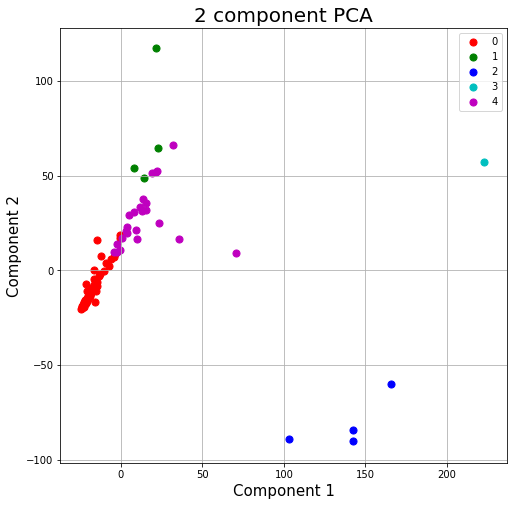

In [19]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'c', 'm']

# 각 군집별로 색을 달리 하여 화면에 출력
for target, color in zip(targets, colors):
    indices = [i for i, x in enumerate(clusters.labels_) if x == target]
    
    ax.scatter(principalDf.loc[indices, 'component 1'],
               principalDf.loc[indices, 'component 2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()
